# PROJECT 11 뉴스 요약봇 만들기

긴 문장을 짦게 요약해주는 요약기를 만들어보겠습니다.

## 1 텍스트 요약(Text Summarization) 이란?

> **텍스트 요약(Text Summarization)**  
긴 길이의 문서원문을 핵심 주제만으로 구성된 짧은 요약문장들로 변환하는 것을 의미합니다.  

<br/>
텍스트 요약은 크게 추출적 요약(Extractive Smmarization)과 추상적 요약(Abstractive Summarizatio)의 두 가지 접근으로 나누어볼 수 있습니다.  

### 1.1 추출적 요약(Extractive Summarization)

추출적 요약은 단어 그대로 원문에서 문장들을 추출해서 요약하는 방식입니다.  
딥러닝보다는 주로 전통적인 머신러닝 방식에 속하는 텍스트랭크(TextRank) 와 같은 알고리즘을 사용해서 이 방법을 사용합니다.  

*텍스트 랭크 : 유사도를 비교하여 문장과 단어에 가중치를 매겨 하나의 문서를 요약해주는 알고리즘이다.  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;하지만 요약을 한다기 보다는 빈도가 높은 단어와 문장들을 추출해내는 성격이 강하다.*

### 1.2 추상적 요약(Abstractive Summarization)

원문으로부터 내용이 요약된 새로운 문장을 생성하는 방식입니다.  
RNN, LSTM, GRU 으로 추상적 요약 방식을 구현할 수 있습니다.  

## 2 인공 신경망으로부터 텍스트 요약  훈련시키기

### 2.1 RNN(Recurrent Neural Network)
RNN 은 시퀀스 모델입니다. 입력과 출력을 시퀀스 단위로 처리하는 모델입니다.  
RNN 은 은닉층의 노드에서 활성화 함수를 통해 나온 결과값을 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징을 갖고있습니다.  
RNN 은 비교적 짧은 시퀀스에 대해서만 효과를 보이는 단점이 있습니다.  
그래서 시퀀스가 점점 길어질 수록 앞의 정보가 뒤로 충분히 전달되지 못하는 장기 의존성 문제(Long-Term Dependencies)가 발생합니다.  
<br/>
*시퀀스 : 연관된 연속의 데이터입니다.*  
<br/>  

![RNN](RNN.png)
*이미지 출처 : http://journal.auric.kr/kiee/XmlViewer/f380862*

### 2.2 LSTM(Long Short-Term Memory)
RNN 의 장기 의존성 문제를 보완한 RNN 의 일종을 LSTM이라고 합니다.  
LSTM 은 은닉층에 복잡한 계산을 추가하여 불필요한 기억을 지우고, 기억해야할 것들을 정합니다.  
<br/>  

![LSTM](LSTM.png)
*이미지 출처 : http://journal.auric.kr/kiee/XmlViewer/f380862*

### 2.3 Seq2Seq(Sequence-to-Sequence)
seq2seq 는 두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해내는 자연어 생성 모델입니다.  
seq2seq 는 크게 두 개로 구성된 아키텍처로 구성되는데, 바로 인코더와 디코더입니다.  
인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보를 압축해서 하나의 벡터(컨텍스트 벡터)로 만듭니다.  
디코더는 인코더에서 만든 벡터를 받아서 단어들을 한 개씩 순차적으로 출력합니다.

정리하자면 seq2seq 모델은 인코더에서 입력 시퀀스를 컨텍스트 벡터라는 하나의 고정된 크기의 벡터 표현으로 압축하고,  
디코더는 이 컨텍스트 벡터를 통해서 출력 시퀀스를 만들어 냅니다.  
  
![seq2seq](seq2seq.png)
*이미지 출처 : https://wikidocs.net/24996*

seq2seq 구조에서 디코더는 시작 토큰 sos가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 eos를 예측하는 순간까지 멈추지 않습니다.  
다시 말해 훈련 데이터의 예측 상대 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야하는지 알려줘야합니다.  
  
![seq2seq02](seq2seq02.png)  
*이미지 출처 : https://wikidocs.net/24996*

### 2.4 어텐션 메커니즘 (Attention Mechanism)
seq2seq 모델은 크게 두 가지 문제점이 있습니다.  

> 첫째, 하나의 고정된 크기의 벡터에 모든 정보를 압축하려고 하니 정보 손실이 발생합니다.  
둘째, RNN의 고질적인 문제인 기울기 손실 문제가 존재합니다.  

그래서 입력 문장이 길면 모델의 성능이 떨어지는 현상이 발생합니다.  
이를 보완하기 위해 등장한 기법이 어텐션 메커니즘(Attention Mechanism) 입니다.  
  
![attention](attention.png)  
*이미지 출처 : https://wikidocs.net/22893*

어텐션 메커니즘의 기본 아이디어는 디코더에서 출력 단어를 예측하는 매 시점마다, 인코더에서의 전체 입력 문장을 다시 한 번 참고한다는 것입니다.  
단, 전체 입력 문장을 전부 다 동일한 비율로 참고하는 것이 아니라, 해당 시점에서 예측해야할 단어와 연관이 있는 입력 단어 부분을 좀 더 집중해서 봅니다.

<br/>  

**```seq2seq 모델을 통해서 추상적 요약 방식의 텍스트 요약기를 만들어 보도록 하겠습니다.```**

<br/>  

## 3 데이터 준비하기

### 3.1 데이터 다운로드하기

터미널에서 아래의 명령어를 입력하여 파일을 다운로드 받습니다.  

`$ wget https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv`  

### 3.2 모듈과 패키지 불러오기

데이터 전처리를 위해 필요한 모듈과 패키지를 불러옵니다.

In [2]:
import nltk
nltk.download('stopwords')    # nltk 패키지의 불용어 사전 : 요약하는데는 거의 의미가 없는 100여개의 불용어가 미리 정리 되어 있음.

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

[nltk_data] Downloading package stopwords to /home/aiffel-
[nltk_data]     dj41/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 3.3 데이터 살펴보기

다운로드 받은 데이터는 총 98,401 개의 샘플을 갖고있습니다.  

In [3]:
data_dir = os.getenv("HOME")+"/aiffel/exploration/news_summarization/data/news_summary_more.csv"

data = pd.read_csv(data_dir, encoding='iso-8859-1')
print('전체 샘플수 :',(len(data)))

전체 샘플수 : 98401


In [3]:
data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


데이터는 기사의 본문에 해당되는 text와 기사의 제목에 해당되는 headlines 두 가지 열로 구성되어 있습니다.

## 4 데이터 전처리하기

### 4.1 중복값 제거하기

데이터의 중복 샘플 유무를 확인한 후, 중복 샘플을 제거하도록 하겠습니다.

In [4]:
data.nunique()

headlines    98280
text         98360
dtype: int64

98,401 개의 전체 데이터에서 text 에는 98,360 개의 유니크한 데이터가 있고, headlines 에는 98,280개의 유니크한 데이터가 있습니다.  
text 달라도 headlines 는 동일할 수 있으므로 text 의 중복 데이터만 제거하겠습니다.

In [5]:
data.drop_duplicates(subset = ['text'], inplace = True)

print('전체 샘플수 :',(len(data)))

전체 샘플수 : 98360


### 4.2 null값 제거하기

데이터에 null 값이 있는지 확인하고, null 값을 가진 데이터는 제거하도록 하겠습니다.

In [6]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

데이터에 null 값이 존재하지 않습니다.

### 4.3 텍스트 정규화 및 불용어 제거하기

#### 4.3.1 텍스트 정규화

데이터 안에 들어있는 단어들 중에는 같은 의미인데도 다른 표현으로 쓰여 마치 다른 단어들처럼 간주되는 경우가 있습니다.  
예를 들어 it'll 과 it will 은 같은데 다른 단어들처럼 간주될 수 있습니다.  
그래서 기계를 학습시키기 전에 같은 표현으로 통일시켜주는 작업을 해야합니다. 이를 텍스트 정규화 라고 합니다.  

정규화 사전을 아래와 같이 구성합니다.

In [7]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ",len(contractions))

정규화 사전의 수:  120


#### 4.3.2 불용어

데이터에는 자주 등장하지만 자연어 처리를 할때 실질적으로 별로 도움이 되지 않는 단어들이 존재합니다.  
이를 불용어 라고 부릅니다. 이러한 불용어는 성능을 저하시킬 수 있으므로 제거를 하는게 좋습니다.  

NLTK 에서 제공하는 불용어 리스트를 참조하여 불용어를 제거할 것입니다.

In [8]:
print('불용어 개수 :', len(stopwords.words('english')))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

#### 4.3.3 전처리 함수

데이터를 정규화하고, 불용어를 제거하는 작업을 함수로 만들어서 전처리하도록 하겠습니다.

In [9]:
#데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","",sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_text, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
everything bought was great infact ordered twice and the third ordered wasfor my mother and father


위 출력 결과를 통해 temp_text 의 문자열이 전처리 된것을 확인할 수 있습니다.  
text 는 불용어를 제거하고, summary 는 불용어를 제거하지 않는다는 것에 주의하시길 바랍니다.

전처리 함수가 잘 작동하는 것을 확인했으니, 훈련 데이터 전체에 대해서 전처리를 수행하겠습니다.

In [10]:
clean_text = []

# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['text']:
    clean_text.append(preprocess_sentence(s))
    

In [11]:
# 전처리 후 출력
print('='*52 ,'전처리 전', '='*52)
print(data.loc[0, 'text'])
print()
print('='*52 ,'전처리 후', '='*52)
print(clean_text[0])

==================================================== 전처리 전 ====================================================
Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.

==================================================== 전처리 후 ====================================================
saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers


In [12]:
clean_summary = []

# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['headlines']:
    clean_summary.append(preprocess_sentence(s, False))

In [13]:
# 전처리 후 출력
print('='*28 ,'전처리 전', '='*28)
print(data.loc[0, 'headlines'])
print()
print('='*28 ,'전처리 후', '='*28)
print(clean_summary[0])

============================ 전처리 전 ============================
upGrad learner switches to career in ML & Al with 90% salary hike

============================ 전처리 후 ============================
upgrad learner switches to career in ml al with salary hike


전처리 과정을 거친 후에 다시 한번 빈 값(" ") 이 있는지 확인하는 것이 좋습니다.  
전처리 전에는 데이터가 존재했지만, 전처리 과정에서 문장의 모든 단어가 사라지는 경우가 있을 수 있기때문입니다.

In [14]:
data['text'] = clean_text
data['headlines'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [15]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [16]:
data.dropna(axis=0, inplace=True)

print('전체 샘플수 :',(len(data)))#데이터 전처리 함수

전체 샘플수 : 98360


### 4.4 샘플의 최대 길이 정하기

Text와 Summary의 최소, 최대, 평균 길이를 구하고, 길이 분포를 시각화해서 보도록 하겠습니다.

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


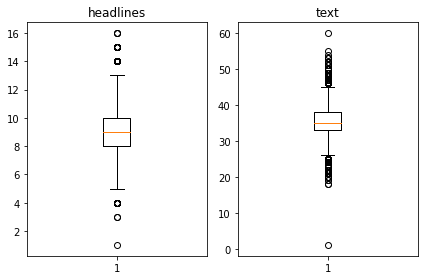

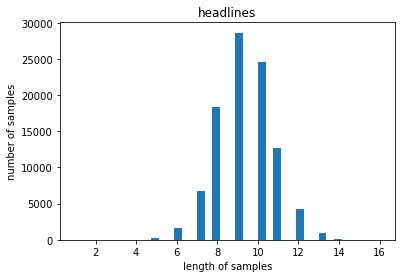

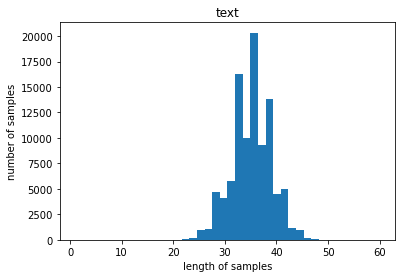

In [17]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('headlines')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('text')
plt.tight_layout()
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

text의 경우 최소 길이가 1, 최대 길이가 60, 평균 길이는 35 입니다.  
시각화 된 그래프로 봤을 때는 대체적으로 50 내외의 길이를 가진다는 것을 확인할 수 있습니다.  

headlines의 경우 최소 길이가 1, 최대 길이가 16, 그리고 평균 길이가 9 입니다.  
그래프로 봤을때, 대체적으로 14 이하의 길이를 가지고 있습니다.  

각 컬럼의 최소 길이와 최대 길이의 차이가 크지 않습니다. 그래서 text의 최대 길이는 50으로, headlines의 최대 길이는 14로 설정하겠습니다.  

`below_threshold_len` 함수에 훈련 데이터와 샘플의 길이를 입력하면, 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인할 수 있습니다.

In [18]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

text_max_len = 50
headlines_max_len = 14

below_threshold_len(text_max_len, data['text'])
below_threshold_len(headlines_max_len,  data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9998576657177715
전체 샘플 중 길이가 14 이하인 샘플의 비율: 0.9997763318422123


문장 길이를 각각 50과 14로 패딩하게 되면, 데이터의 샘플들을 전부다 사용하게 됩니다.

In [19]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]

print('전체 샘플수 :',(len(data)))

전체 샘플수 : 98324


최종적으로 **98,401** 개의 데이터가 전처리 과정을 통해서 **98,324** 개의 데이터가 되었습니다.

### 4.5 시작 토큰과 종료 토큰 추가하기

seq2seq 모델의 디코더는 시작 토큰을 입력받아 문장을 생성하기 시작하고, 종료 토큰을 예측한 순간 문장 생성을 멈춥니다.  
그래서 seq2seq 훈련을 위해서 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가해야 합니다.

시작 토큰은 'sostoken', 종료 토큰은 'eostoken' 이라고 임의로 정하고, 앞뒤로 추가하도록 하겠습니다.

In [20]:
#요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')

data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...


In [21]:
# 인코더의 입력, 디코더의 입력, 레이블을 각각 numpy 타입으로 저장

encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### 4.6 훈련 데이터와 테스트 데이터 나누기

훈련 데이터와 테스트 데이터는 직접 코딩을 통해서 분리하도록 하겠습니다.

In [22]:
# 데이터의 샘플 순서를 섞습니다.
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)

encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

print(indices)

[37895 23875 50404 ... 32792 36593 65926]


In [23]:
# 섞인 데이터를 8:2의 비율로 훈련 데이터와 테스트 데이터로 분리합니다.
n_of_val = int(len(encoder_input)*0.2)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 78660
훈련 레이블의 개수 : 78660
테스트 데이터의 개수 : 19664
테스트 레이블의 개수 : 19664


### 4.7 단어 집합 만들기

기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 모든 단어들을 모두 정수로 바꿔줍니다.  
이를 위해서 각 단어에 고유한 정수를 맵핑하는 작업이 필요합니다. 이 과정을 단어 집합을 만든다고 표현합니다.

Keras의 Tokenizer()를 사용하면, 입력된 훈련 데이터로부터 단어 집합을 만들 수 있습니다.

In [24]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

생성된 단어 집합으로부터 빈도수가 낮은 단어들은 훈련 데이터에서 제외하도록 하겠습니다.  
등장 빈도수가 11회 미만인 단어들이 데이터에서 얼만큼의 비중을 차지하는지 확인해 보도록 하겠습니다.

In [25]:
threshold = 11
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 69640
등장 빈도가 10번 이하인 희귀 단어의 수: 52157
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 17483
단어 집합에서 희귀 단어의 비율: 74.89517518667432
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.88893751100337


등장 빈도가 11회 미만인 단어들은 단어 집합에서 약 75% 를 차지합니다.  
하지만, 실제로 훈련 데이터에서 등장 빈도로 차지하는 비중은 상대적으로 적은 수치인 약 5% 밖에 되지 않습니다.  
그래서 등장 빈도가 10회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거합니다.  
단어 집합의 크기를 17,000으로 제한하도록 하겠습니다.

In [26]:
src_vocab = 17000
src_tokenizer = Tokenizer(num_words = src_vocab) # 단어 집합의 크기를 20000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

#잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[4197, 9, 1134, 10, 53, 2563, 37, 63, 9843, 1176, 732, 911, 10237, 1326, 911, 17, 812, 2656, 327, 1967, 99, 45, 272, 10237, 179, 1354, 342, 2094, 9, 1], [3, 13, 993, 80, 2515, 4839, 999, 657, 773, 7252, 56, 592, 55, 9, 14781, 177, 1247, 518, 4569, 469, 5936, 3003, 469, 1247, 1247, 1295, 4713, 15386, 136, 658, 6, 816], [1867, 525, 3052, 9479, 3068, 499, 4007, 1106, 42, 19, 6396, 387, 77, 663, 433, 1311, 7458, 1164, 19, 232, 1867, 525, 8019, 9288, 414, 5102, 29, 12, 5151, 34, 4007, 1106, 3533, 3624, 19, 303, 635, 310, 295]]


headlines 데이터에 대해서도 동일한 작업을 수행하겠습니다.

In [27]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [34]:
threshold = 8
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 30166
등장 빈도가 7번 이하인 희귀 단어의 수: 21363
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8803
단어 집합에서 희귀 단어의 비율: 70.81813962739508
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.951513954550505


In [35]:
tar_vocab = 8500
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

#잘 변환되었는지 확인
print('input ',decoder_input_train[:5])
print('decoder ',decoder_target_train[:5])

input  [[1, 20, 4683, 6, 69, 7, 6, 548, 2409], [1, 565, 97, 2283, 7677, 6, 1109, 97, 8, 313, 621], [1, 456, 4286, 1654, 51, 7], [1, 75, 5208, 838, 4287, 14, 6479], [1, 314, 4817, 260, 3115, 983, 175]]
decoder  [[20, 4683, 6, 69, 7, 6, 548, 2409, 2], [565, 97, 2283, 7677, 6, 1109, 97, 8, 313, 621, 2], [456, 4286, 1654, 51, 7, 2], [75, 5208, 838, 4287, 14, 6479, 2], [314, 4817, 260, 3115, 983, 175, 2]]


정상적으로 정수 인코딩 작업이 끝났습니다.  
전체 데이터에서 빈도수가 낮은 단어가 삭제되었다는 것은 빈도수가 낮은 단어만으로 구성되었던 샘플들은 빈 샘플이 되었을 가능성이 있습니다.  
요약문의 길이가 1인 샘플들은 모두 삭제하도록 하겠습니다. (빈 샘플은 시작 토큰과 종료 토큰만 남아있기 때문에 길이가 1인 샘플 삭제)

In [36]:
print('='*10 ,'삭제 전', '='*10)
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

========== 삭제 전 ==========
훈련 데이터의 개수 : 78660
훈련 레이블의 개수 : 78660
테스트 데이터의 개수 : 19664
테스트 레이블의 개수 : 19664


In [37]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0


/home/aiffel-dj41/anaconda3/envs/aiffel/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [38]:
print('='*10 ,'삭제 후', '='*10)
print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

========== 삭제 후 ==========
훈련 데이터의 개수 : 78659
훈련 레이블의 개수 : 78659
테스트 데이터의 개수 : 19664
테스트 레이블의 개수 : 19664


### 4.8 패딩하기

텍스트 시퀀스를 정수 시퀀스로 변환했다면, 이제 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 패딩 작업을 해주어야 합니다.  
아까 정해두었던 최대 길이로 패딩하도록 하겠습니다. (= 최대 길이보다 짧은 데이터들 뒤의 공간에 숫자 0을 넣어 최대 길이로 맞추기)

In [39]:
print('='*52 ,'패딩 전', '='*52)
print('encoder_input_train')
print(encoder_input_train[0])
print()
print('encoder_input_test')
print(encoder_input_test[0])
print()
print('decoder_input_train')
print(decoder_input_train[0])
print()
print('decoder_target_train')
print(decoder_target_train[0])
print()
print('decoder_input_test')
print(decoder_input_test[0])
print()
print('decoder_target_test')
print(decoder_target_test[0])
print()

==================================================== 패딩 전 ====================================================
encoder_input_train
[4197, 9, 1134, 10, 53, 2563, 37, 63, 9843, 1176, 732, 911, 10237, 1326, 911, 17, 812, 2656, 327, 1967, 99, 45, 272, 10237, 179, 1354, 342, 2094, 9, 1]

encoder_input_test
[4112, 345, 147, 318, 212, 8837, 4105, 1134, 12230, 456, 212, 187, 78, 7, 345, 147, 129, 1571, 143, 255, 809, 212, 40, 147, 8425, 3693, 4105, 328]

decoder_input_train
[1, 20, 4683, 6, 69, 7, 6, 548, 2409]

decoder_target_train
[20, 4683, 6, 69, 7, 6, 548, 2409, 2]

decoder_input_test
[1, 3708, 521, 15, 527, 6, 5776, 515, 3947]

decoder_target_test
[3708, 521, 15, 527, 6, 5776, 515, 3947, 2]



In [40]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = headlines_max_len, padding='post')

In [41]:
print('='*52 ,'패딩 후', '='*52)
print('encoder_input_train')
print(encoder_input_train[0])
print()
print('encoder_input_test')
print(encoder_input_test[0])
print()
print('decoder_input_train')
print(decoder_input_train[0])
print()
print('decoder_target_train')
print(decoder_target_train[0])
print()
print('decoder_input_test')
print(decoder_input_test[0])
print()
print('decoder_target_test')
print(decoder_target_test[0])
print()

==================================================== 패딩 후 ====================================================
encoder_input_train
[ 4197     9  1134    10    53  2563    37    63  9843  1176   732   911
 10237  1326   911    17   812  2656   327  1967    99    45   272 10237
   179  1354   342  2094     9     1     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]

encoder_input_test
[ 4112   345   147   318   212  8837  4105  1134 12230   456   212   187
    78     7   345   147   129  1571   143   255   809   212    40   147
  8425  3693  4105   328     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0]

decoder_input_train
[   1   20 4683    6   69    7    6  548 2409    0    0    0    0    0]

decoder_target_train
[  20 4683    6   69    7    6  548 2409    2    0    0    0    0    0]

decoder_input_test
[   1 3708  521   15  527    6

## 5 모델 설계하기

### 5.1 인코더 설계하기

함수형 API를 이용해서 인코더를 설계해 보도록 하겠습니다.

In [42]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 256
hidden_size = 512

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

### 5.2 디코더 설계하기

디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일합니다.  
하지만 LSTM의 입력을 정의할 때, initial_state의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 합니다.

In [43]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

디코더의 출력층을 설계하겠습니다.

In [44]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 256)      4352000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 512), (N 1574912     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

### 5.3 어텐션 메커니즘

이미 구현된 어텐션 함수를 가져와서 디코더의 출력층과 결합해 보도록 하겠습니다.  
<br/>

아래의 코드를 수행하여 깃허브에 공개되어 있는 어텐션 함수를 다운로드합니다.

In [45]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

어텐션 메커니즘을 사용하기 위해 설계한 디코더의 출력층을 수정합니다.

In [46]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 256)      4352000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 512), (N 1574912     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## 6 모델 훈련하기

설계한 모델을 가지고 훈련을 진행하겠습니다.

`EarlyStopping` 을 사용하여, 특정 조건이 충족되면 모델의 훈련이 멈추도록 하겠습니다.  
검증 데이터의 손실을 모니터링 하면서, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 관측되면 학습을 멈추도록 설정합니다.  

In [47]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 128, callbacks=[es], epochs = 50)

Epoch 1/50
615/615 [==============================] - 305s 497ms/step - loss: 4.5373 - val_loss: 4.0731
Epoch 2/50
615/615 [==============================] - 305s 496ms/step - loss: 3.8688 - val_loss: 3.6582
Epoch 3/50
615/615 [==============================] - 299s 486ms/step - loss: 3.5196 - val_loss: 3.4168
Epoch 4/50
615/615 [==============================] - 300s 488ms/step - loss: 3.2802 - val_loss: 3.2853
Epoch 5/50
615/615 [==============================] - 300s 488ms/step - loss: 3.0951 - val_loss: 3.1668
Epoch 6/50
615/615 [==============================] - 300s 488ms/step - loss: 2.9485 - val_loss: 3.0942
Epoch 7/50
615/615 [==============================] - 300s 488ms/step - loss: 2.8265 - val_loss: 3.0490
Epoch 8/50
615/615 [==============================] - 300s 488ms/step - loss: 2.7253 - val_loss: 3.0098
Epoch 9/50
615/615 [==============================] - 286s 465ms/step - loss: 2.6332 - val_loss: 2.9793
Epoch 10/50
615/615 [==============================] - 270s 439m

훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화 해보도록 하겠습니다.

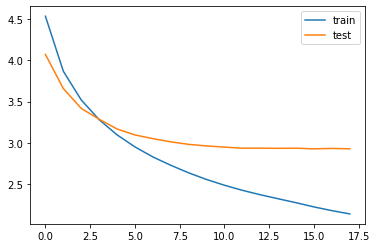

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 7 인퍼런스 모델 구현하기

테스트 단계에서 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원해야 하므로, 필요한 3개의 사전을 미리 준비합니다.

In [49]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로, 그에 맞게 모델 설계를 별도로 진행해야합니다.  
인코더 모델과 디코더 모델을 분리하여 인퍼런스 모델을 설계합니다.

In [50]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [51]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [52]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수

def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## 8 모델 테스트하기

테스트 단계에서 정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하도록 하겠습니다.

주어진 정수 시퀀스 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들겠습니다.  
함수를 만들 때, 숫자 0(패딩), 시작 토큰, 종료 토큰을 출력에서 제외시키고 만들겠습니다.

In [53]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

테스트 데이터 약 50개의 샘플에 대해서 실제 요약과 예측된 요약을 비교해보도록 하겠습니다.

In [62]:
for i in range(10000, 10005):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : russian businessman engaged lawsuit false trump russian ties filed motion titled six ways misled court picture kitten page filing addressed allegedly facts argument get lawsuit dismissed 
실제 요약 : lawyers file motion on six ways the court 
예측 요약 :  russian firm sues us over false charges


원문 : brihanmumbai municipal corporation reportedly way start online application process speed granting approvals ganpati mumbai process developing software clear year application officials said notably city organisers seek permissions structures 
실제 요약 : mumbai civic body to approve ganpati online 
예측 요약 :  mumbai civic body to allow local to


원문 : former footballer david beckham criticised calling hong kong china beckham spent two days shanghai hong kong following posted facebook video captioned great hours china although caption later changed user posted government currency even football team 
실제 요약 : david beckham slammed for to hong kong as china 
예측 요약 :  david beckham slammed for china pos

**1. 첫번째 샘플 요약 비교** 

>실제 요약 : lawyers file motion on six ways the court  
예측 요약 : russian firm sues us over false charges 

원문 내용은 법, 소송과 관련된 내용으로, 무엇인가 '재판' 하고 있다는 점에서 잘 요약한 것 같다.
  
**2. 두번째 샘플 요약 비교**  

>실제 요약 : mumbai civic body to approve ganpati online  
예측 요약 : mumbai civic body to allow local to 

원문 내용은 뭄바이시가 온라인 허가를 위해 힘쓴다는 내용으로, '뭄마이시가 무엇을 한다.'는 점에서 잘 요약한 것 같다. 

**3. 세번째 샘플 요약 비교**  

>실제 요약 : david beckham slammed for to hong kong as china  
예측 요약 : david beckham slammed for china post on paris

원문 내용은 데이비드 베컴이 중국을 비난했다는 내용으로, '데이비드 배컴이 중국을 향해 등을 돌렸다.'는 점에서 잘 요약한 것 같다.  

**4. 네번째 샘플 요약 비교**  

>실제 요약 : militants civilians die in in  
예측 요약 : militants killed in encounter in jammu and kashmir 

원문 내용은 경찰이 사람의 목숨을 빼앗았다는 내용으로, '누군가가 죽었다.'는 점에서 잘 요약한 것 같다.  

**5. 다섯번째 샘플 요약 비교**  

>실제 요약 : year old girl raped by in punjab  
예측 요약 : girl raped by year old girl in punjab 

원문 내용은 여성이 성폭행을 당했다는 내용으로, '여성이 강간당했다.'는 점에서 잘 요약한 것 같다.

## 9 추출적 요약 해보기

추출적 요약은 본문에 존재하는 단어구, 문장을 뽑아서 요약하는 방법입니다.  

### 9.1 summarize 사용하기
패키지 `Summa` 에서는 추출적 요약을 위한 모듈인 `summarize` 를 사용하여 간단하게 추출적 요약을 해보도록 하겠습니다.  
`Summa` 의 `summarize()` 의 인자로 사용되는 값들은 아래와 같습니다.  
> text (str) : 요약할 텍스트  
ratio (float, optional) : 요약문을 생성할때, 원본에서 선택되는 문장 비율  
words (int or None, optional) : 출력에 포함할 단어 수
split (bool, optional) : True면 문장 list / False 는 조인된 문자열을 반환

In [35]:
from summa.summarizer import summarize

for i in range(5):
    print("원문 :", data.loc[i, ['text']][0])
    print("실제 요약 :", data.loc[i, ['headlines']][0])
    print("추출적 요약 :", summarize(data.loc[i, ['text']][0], ratio=0.5))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출적 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
추출적 요약 : Users get one CRED coin per rupee of bill p

### 9.2 keywords 사용하기
패키지 `Summa` 에서 `keywords` 모듈을 사용하면 텍스트에서 중요한 단어를 추출할 수 있습니다.  
`Summa` 의 `keywords()` 을 사용하여 키워드를 추출해보도록 하겠습니다.  
`Summa` 의 `keywords()` 의 인자로 사용되는 값들 `summarize()` 의 인자와 같습니다.  

In [36]:
from summa.keywords import keywords

for i in range(5):
    print("원문 :", data.loc[i, ['text']][0])
    print("실제 요약 :", data.loc[i, ['headlines']][0])
    print("키워드 :", keywords(data.loc[0, ['text']][0], words = 5, split=True))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
키워드 : ['saurav', 'kant', 'power', 'powered', 'career', 'careers', 'hike']


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
키워드 : ['saurav', 'kant', 'power', 'powered', 'c

추출적 요약을 통해 요약한 문장을 보면 원본에 있는 문장을 그대로 가져와서 요약을 하거나, 원본에 있는 단어를 그대로 가져와서 키워드로 추출합니다.  


| | 추상적 요약 | 추출적 요약 |
|:----------|:----------|:----------|
| 정의 | 원문에 없던 문장이라도 핵심 문맥을 반영한 새로운 문장을 생성해서 원문을 요약하는 방법 | 원문에서 중요한 핵심 문장이나 단어를 몇 개 뽑아서 요약문을 만드는 방법 |
| 난이도 | 상 | 하 |
| 방법 | seq2seq | Summa 의 summarize(), keywords() |

# [ 결과 - 루브릭 ]
**1. Abstractive 모델 구성을 위한 텍스트 전처리 단계가 체계적으로 진행되었다.**
- 분석단계, 정제단계, 정규화와 불용어 제거, 데이터셋 분리, 인코딩 과정이 빠짐없이 체계적으로 진행되었습니다. :)  

**2. 텍스트 요약모델이 성공적으로 학습되었음을 확인하였다.** 
- 모델학습이 안정적으로 수렴되었음을 그래프를 통해 확인하였으며, 실제 요약문과 유사한 요약문장을 얻을 수 있었습니다. :)
  
**3. Extractive 요약을 시도해 보고 Abstractive 요약 결과와 함께 비교해 보았다.**
- 두 요약 결과를 비교해 보았습니다. :)